In [2]:
import pandas as pd
import matplotlib.pyplot as plt

claim = pd.read_csv('https://raw.githubusercontent.com/hdougt29/ClaimsDataAnalysis/main/ClaimsData.csv')
claim.head()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


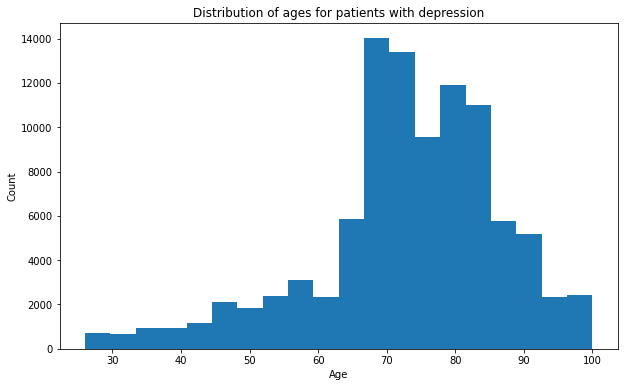

In [3]:
#get records with depression
claim_depression = claim[claim['depression'] == 1]

#get age column
ages = claim_depression['age']

#change figure size
plt.figure(figsize=(10, 6))

#plot age against depression
plt.hist(ages, bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of ages for patients with depression')
plt.show()

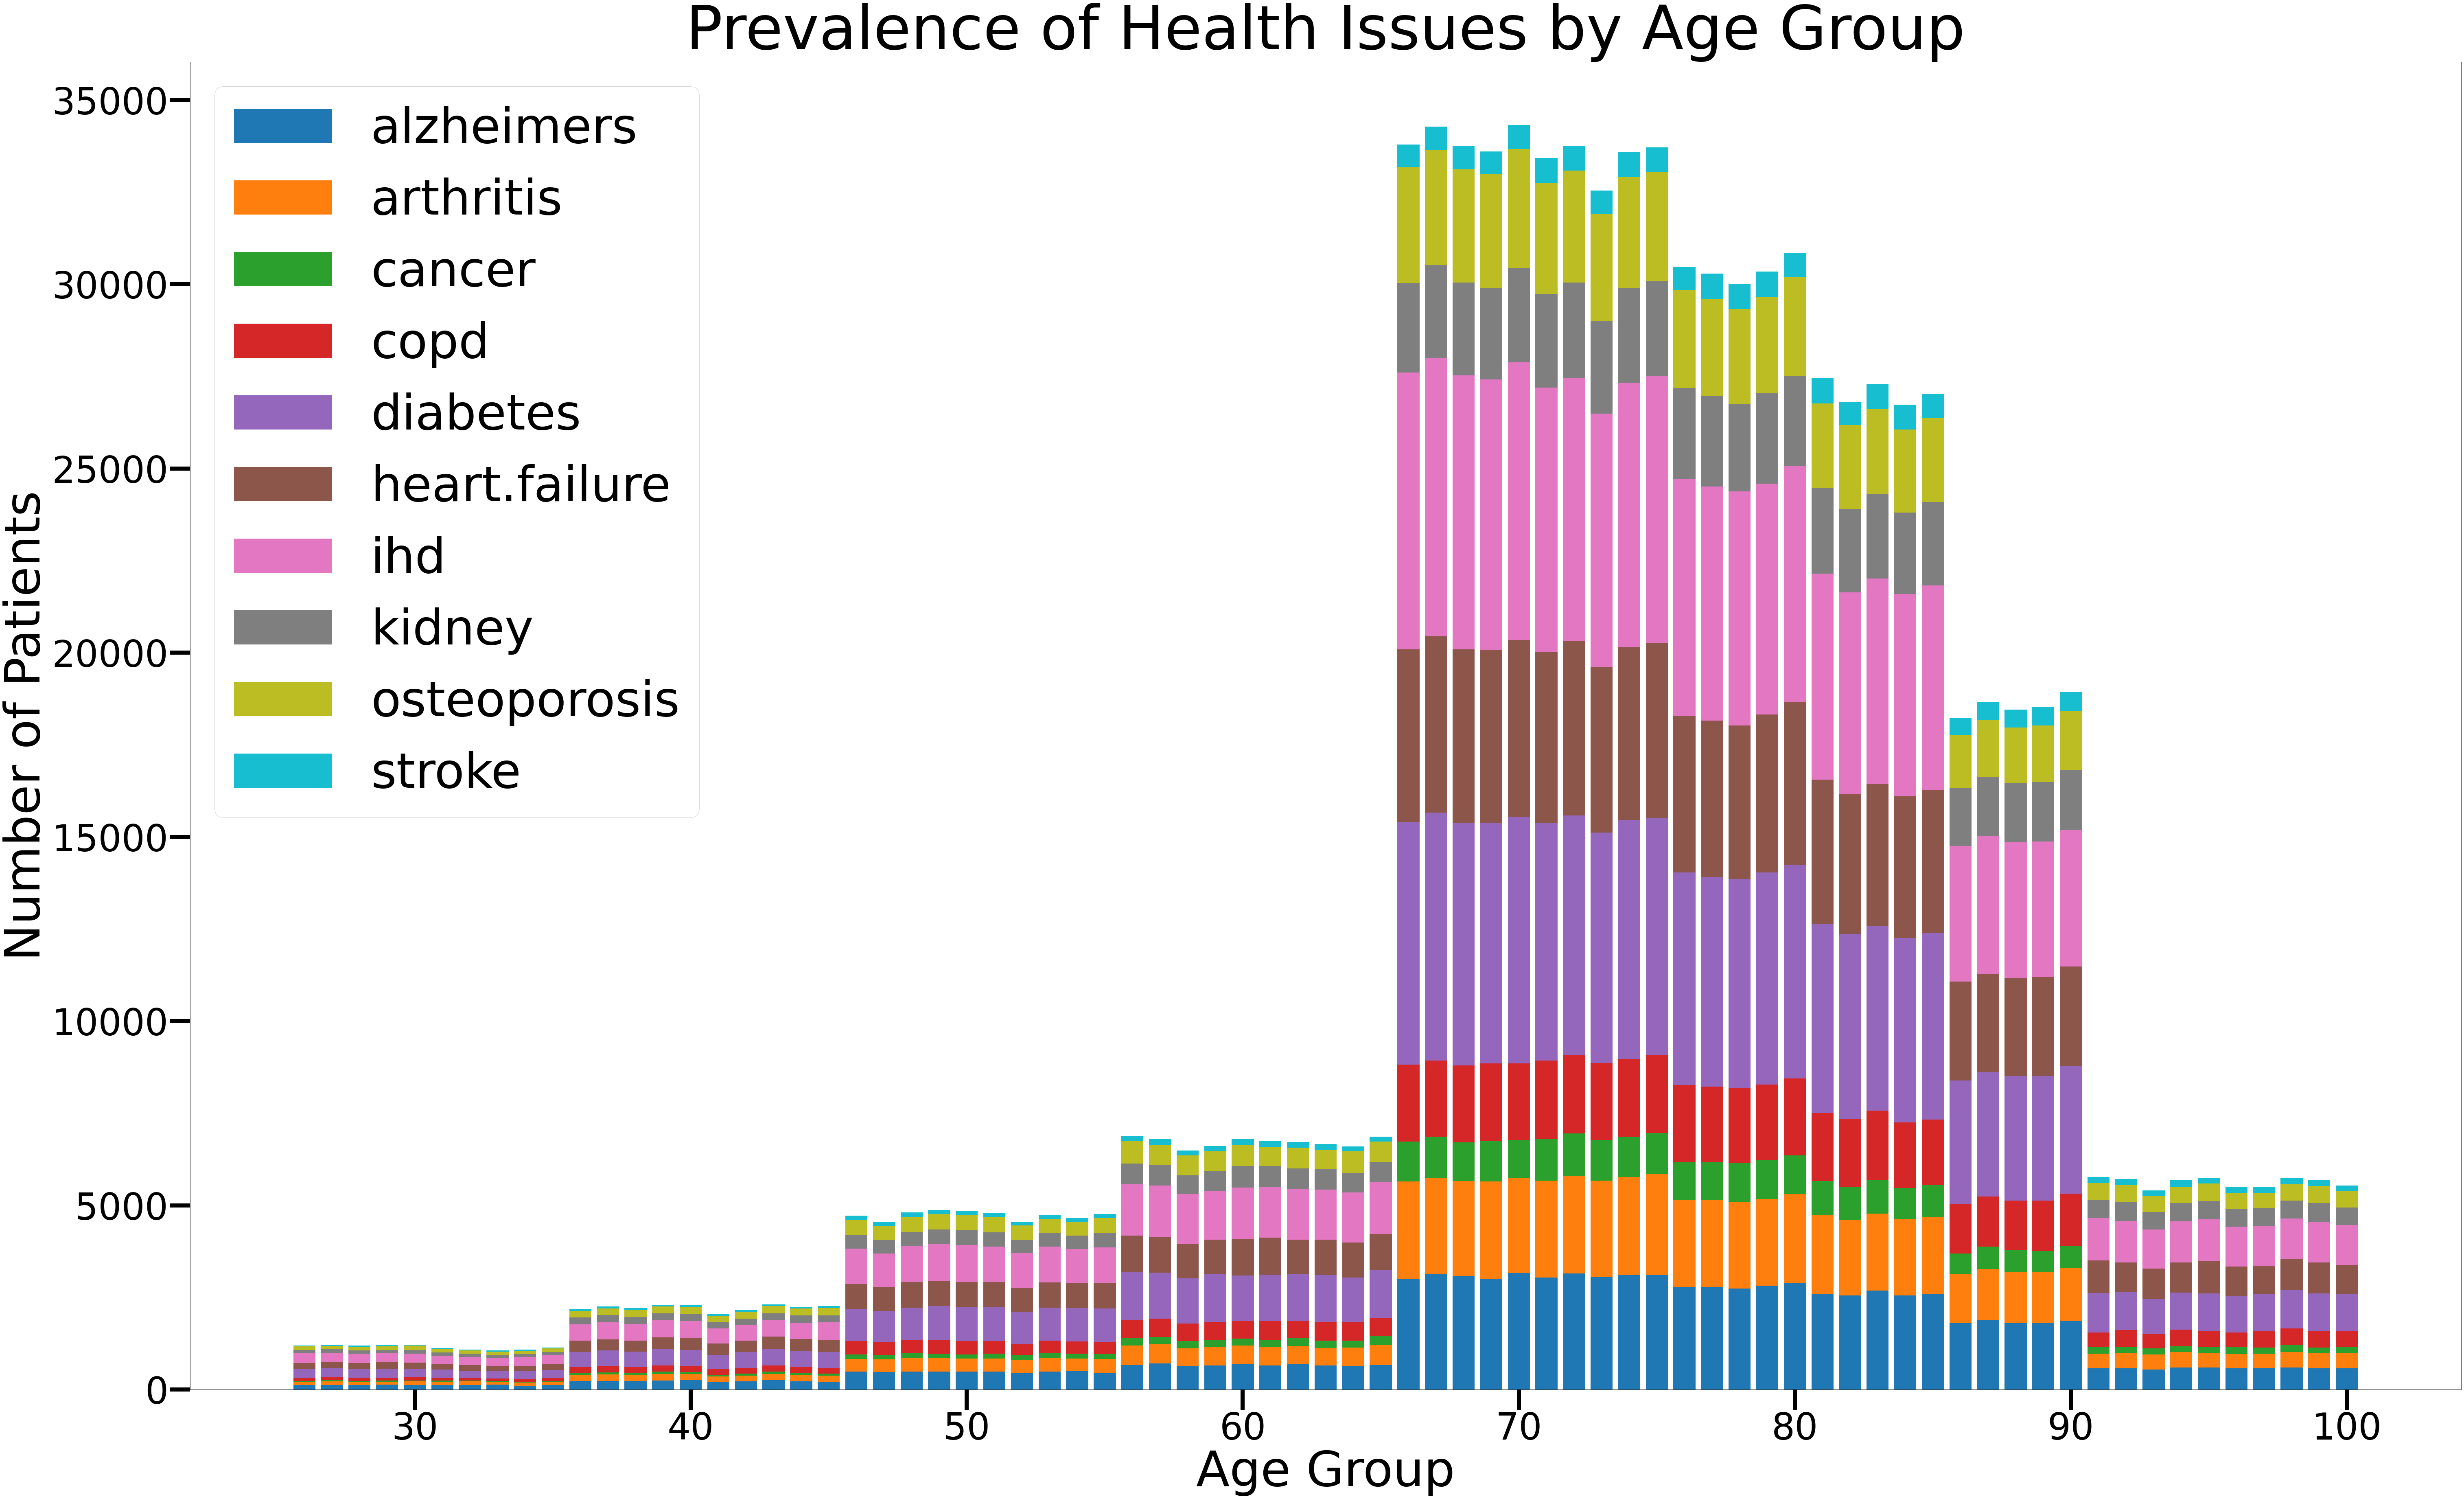

In [4]:
#change figure size
plt.figure(figsize=(100, 60))

#group by age
age_groups = claim.groupby('age')

#assign health issues to variable
variables = ['alzheimers', 'arthritis', 'cancer', 'copd', 'diabetes', 'heart.failure', 'ihd', 'kidney', 'osteoporosis', 'stroke']

#assign health issues to descriptive variable
health_issues = variables

#bottom value for each bar
bottoms = [0] * len(age_groups)

#loop through health issues
for i, issue in enumerate(health_issues):
    #aggregate number of records in each health group
    issue_counts = age_groups[issue].sum()

    #assign age group to bars
    plt.bar(age_groups.groups.keys(), issue_counts, bottom=bottoms)

    #update bottom value after each health issue
    bottoms += issue_counts

#labels for each health issue
labels = variables

#legend
plt.legend(labels, fontsize = 120)

#labels
plt.xlabel('Age Group', fontsize=120)
plt.ylabel('Number of Patients', fontsize=120)

#tick marks
plt.tick_params(length=50, width=10, labelsize = 90)

plt.title('Prevalence of Health Issues by Age Group', fontsize = 150)

#show graph
plt.show()

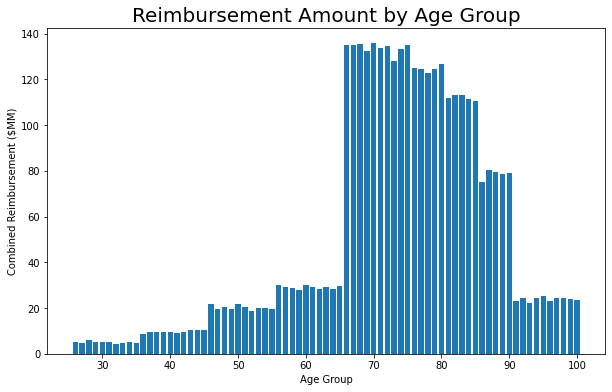

In [5]:
#figure size
plt.figure(figsize=(10, 6))

# Calculate the combined reimbursement for 2008 and 2009
combined_reimbursement = age_groups['reimbursement2008'].sum() + age_groups['reimbursement2009'].sum()

# Divide the combined reimbursement by 1,000,000 to convert to millions of dollars
combined_reimbursement = combined_reimbursement / 1000000

# Plot the combined reimbursement by age group
plt.bar(age_groups.groups.keys(), combined_reimbursement)

# Add labels to the x and y axes
plt.xlabel('Age Group')
plt.ylabel('Combined Reimbursement ($MM)')

plt.title('Reimbursement Amount by Age Group', fontsize = 20)

# Show the plot
plt.show()

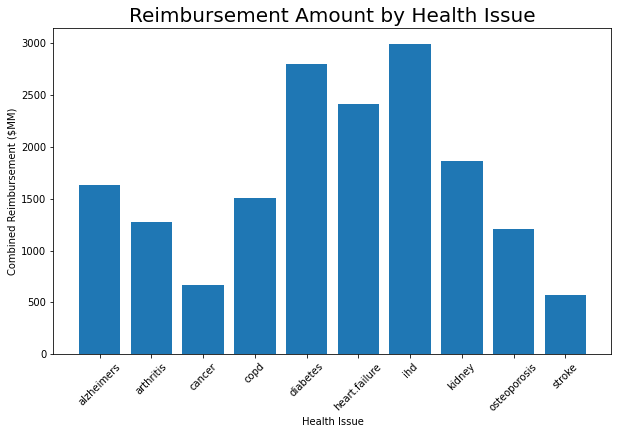

In [10]:
import numpy as np
#figure size
plt.figure(figsize=(10, 6))

#aggregated reimbursements list
combined_reimbursements = []

  #loop through health issues
for i, issue in enumerate(health_issues):
  #aggregate reimbursement totals for each issue if present
  issue_reimbursement = claim[claim[issue] == 1]['reimbursement2008'].sum() + claim[claim[issue] == 1]['reimbursement2009'].sum()
  
  #show as $MM
  issue_reimbursement = issue_reimbursement / 1000000
  
  #add totals to aggregated reimbursements list
  combined_reimbursements.append(issue_reimbursement)

#add axes to bar graph
plt.bar(health_issues, combined_reimbursements)

#labels
plt.xlabel('Health Issue')
plt.ylabel('Combined Reimbursement ($MM)')

#title
plt.title('Reimbursement Amount by Health Issue', fontsize=20)

plt.xticks(np.arange(len(health_issues)), health_issues, rotation=45)

#show graph
plt.show()
